#Perceptron Model

In [0]:
#importing dataset of breast cancer
import sklearn.datasets
# importing numpy
import numpy as np
# importing pandas as pd
import pandas as pd
# import matplotlib for plotting graphs
import matplotlib.pyplot as plt
#imporing seaborn to give neet look 
import seaborn as sns
# importing metrics 
from sklearn.metrics import accuracy_score
sns.set()

In [0]:
class Perceptron:
  def __init__(self):
    self.w = None
    self.b= None

  def model(self,x):
    return 1 if (np.dot(self.w,x)>=self.b) else 0
  
  def predict(self,X):
    Y=[]
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)

  def fit(self,X,Y,epoch=1,learningRate=1):
    self.w= np.ones(X.shape[1])
    self.b = 0
    accuracy = {}
    maxAccuracy=0
    checkPointW =self.w
    checkPointB=self.b
    for i in range(epoch):
      for x,y in zip(X,Y):
        Y_pred = self.model(x)
        if y==1 and Y_pred == 0:
          self.w = self.w + learningRate*x
          self.b = self.b + learningRate*1
        elif y==0 and Y_pred == 1:
          self.w = self.w - learningRate*x
          self.b = self.b - learningRate*1
      accuracy[i] = accuracy_score(self.predict(X),Y)
      if(maxAccuracy<accuracy[i]):
        maxAccuracy = accuracy[i]
        checkPointW = self.w;
        checkPointB = self.b; 
    self.w = checkPointW
    self.b= checkPointB
    a = np.asarray(list(accuracy.values()))
    plt.plot(a)
    plt.show()
      



In [0]:
# Getting data to the varialble
breast_cancer = sklearn.datasets.load_breast_cancer()
# Creating data frame
data = pd.DataFrame(breast_cancer.data,columns= breast_cancer.feature_names)
Y = breast_cancer.target
# 1st parameter = data dataframe
# 2nd parameter = target dataframe
# 3rd parameter = 90% ttraining split 10% test split
# 4th parameter = deterministic split always give same o/p  
X_train, X_test, Y_train, Y_test = train_test_split(data,Y,test_size=0.1, stratify = Y ,random_state=1)

#Binarization of MP Neuron model learninr (beccause it takes only boolean as input
#X_binarised_train = X_train.apply(pd.cut,bins=2,labels=[1,0])
#X_binarised_test = X_test.apply(pd.cut,bins=2,labels=[1,0])

#convert the dataframe to numpy arrays for calulation
X_test =X_test.values
X_train = X_train.values


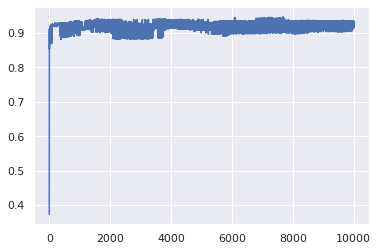

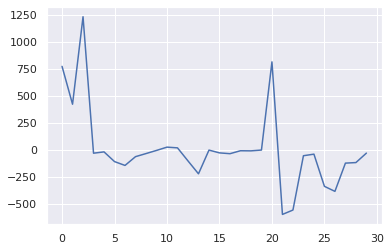

0.947265625
0.9473684210526315


In [0]:
perceptron =Perceptron()
perceptron.fit(X_train,Y_train,10000,0.01)
print()
plt.plot(perceptron.w)
plt.show()
Y_pred = perceptron.predict(X_train)
print(accuracy_score(Y_pred,Y_train))
Y_pred = perceptron.predict(X_test)
print(accuracy_score(Y_pred,Y_test))